### Profanity Detection ✅

##### test data

In [54]:
testConvoProfane = [
    {
        "speaker": "Agent",
        "text": "Hello, this is Kyle from XYZ Collections. How the hell are you?",
        "stime": 0,
        "etime": 7
    },
    {
        "speaker": "Customer",
        "text": "I'm doing well, thank you. How can I assist you today?",
        "stime": 7.5,
        "etime": 12
    },
    {
        "speaker": "Agent",
        "text": "I need to verify your identity before discussing your account. Can you please give me your date of birth?",
        "stime": 11,
        "etime": 21
    },
    {
        "speaker": "Customer",
        "text": "Sure, it's March 15, 1985.",
        "stime": 20,
        "etime": 23
    },
    {
        "speaker": "Agent",
        "text": "Alright, that checks out. Now, you owe us a shitload of money. What the hell are you planning to do about it?",
        "stime": 22,
        "etime": 34
    },
    {
        "speaker": "Customer",
        "text": "I plan to pay it off as soon as possible, but I need to discuss my options.",
        "stime": 33,
        "etime": 38
    },
    {
        "speaker": "Agent",
        "text": "Options? Don't give me that crap. You need to pay up, plain and simple!",
        "stime": 37,
        "etime": 46
    },
    {
        "speaker": "Customer",
        "text": "I understand, but I would like to know if I can set up a payment plan.",
        "stime": 45,
        "etime": 50
    },
    {
        "speaker": "Agent",
        "text": "Payment plan? Who the hell do you think you are? Just pay the damn balance!",
        "stime": 49,
        "etime": 58
    },
    {
        "speaker": "Customer",
        "text": "I really want to resolve this, but I need a reasonable solution.",
        "stime": 57,
        "etime": 62
    },
    {
        "speaker": "Agent",
        "text": "A reasonable solution is to pay what you owe! Stop wasting my time!",
        "stime": 61,
        "etime": 70
    },
    {
        "speaker": "Customer",
        "text": "I will find a way to make this work. Thank you for your time.",
        "stime": 69,
        "etime": 74
    },
    {
        "speaker": "Agent",
        "text": "Whatever, just get it done! Bye!",
        "stime": 73,
        "etime": 80
    }
]

testConvoClean=[
    {
        "speaker": "Agent",
        "text": "Hello, this is Mark from XYZ Collections. Am I speaking with Jessica?",
        "stime": 0,
        "etime": 7
    },
    {
        "speaker": "Customer",
        "text": "Yes, this is Jessica. What is this about?",
        "stime": 8,
        "etime": 12
    },
    {
        "speaker": "Agent",
        "text": "Thank you, Jessica. I'm calling regarding a past due balance with your account. Before we proceed, could you please verify your date of birth?",
        "stime": 11,
        "etime": 24
    },
    {
        "speaker": "Customer",
        "text": "Sure, it's July 15, 1990.",
        "stime": 23,
        "etime": 26
    },
    {
        "speaker": "Agent",
        "text": "Thank you for the confirmation. Can you also provide your current address for verification?",
        "stime": 25,
        "etime": 34
    },
    {
        "speaker": "Customer",
        "text": "Yes, it's 123 Main Street, Springfield.",
        "stime": 33,
        "etime": 36
    },
    {
        "speaker": "Agent",
        "text": "I appreciate that. I can confirm that you have an outstanding balance of $350. How would you like to proceed with this payment?",
        "stime": 35,
        "etime": 45
    },
    {
        "speaker": "Customer",
        "text": "I can pay $200 today and the rest next month.",
        "stime": 44,
        "etime": 49
    },
    {
        "speaker": "Agent",
        "text": "That's perfectly fine. I will note that down. Would you like to handle the payment over the phone or online?",
        "stime": 48,
        "etime": 60
    },
    {
        "speaker": "Customer",
        "text": "Let's do it over the phone.",
        "stime": 59,
        "etime": 62
    },
    {
        "speaker": "Agent",
        "text": "Alright, I will guide you through the payment process. Please have your card ready.",
        "stime": 61,
        "etime": 70
    },
    {
        "speaker": "Customer",
        "text": "Got it, I'm ready.",
        "stime": 69,
        "etime": 72
    },
    {
        "speaker": "Agent",
        "text": "Great! Please provide me with your card number.",
        "stime": 71,
        "etime": 75
    },
    {
        "speaker": "Customer",
        "text": "It's 4111 1111 1111 1111.",
        "stime": 74,
        "etime": 77
    }
]

#### Regex Method

In [25]:
import re

profanity = ['fuck','hell','damn','f***','shit','bullshit','crap','ass','asshole','dumbass','stupid', 'shitload']
censored_patterns = [
        r"f[\W_]*[u\*]+[\W_]*[c\*]+[\W_]*[k\*]+",
        r"s[\W_]*[h\*]+[\W_]*[i\*]+[\W_]*[t\*]+",
        r"d[\W_]*[a\*]+[\W_]*[m\*]+[\W_]*[n\*]*",
]

def contains_profanity(convo):
    profanity_speaker = []
    for message in convo:
        text = message['text'].lower()
        for word in profanity:
            pattern = rf"\b{re.escape(word)}(s|es|ed|ing)?\b"
            if re.search(pattern, text):
                profanity_speaker.append(message['speaker'])
                
        for pattern in censored_patterns:
            if re.search(pattern, text):
                profanity_speaker.append(message['speaker'])
                
    profanity_speaker = list(set(profanity_speaker))
    if profanity_speaker:
        print("⚠️ Profanity detected by:", ", ".join(profanity_speaker))
    else:
        print("✅ No profanity detected.")

In [57]:
contains_profanity(testConvoProfane)
contains_profanity(testConvoClean)

⚠️ Profanity detected by: Agent
✅ No profanity detected.


#### LLM

In [87]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
import torch

In [61]:
def detect_profanity(convo):
    # label_map = {0: "clean", 1: "profane"}
    model = BertForSequenceClassification.from_pretrained(model_path)
    tokenizer = BertTokenizer.from_pretrained(model_path)
    profane_speakers = []

    for msg in convo:
        inputs = tokenizer(msg["text"], return_tensors="pt", padding=True, truncation=True)
        with torch.no_grad():
            logits = model(**inputs).logits
        predicted_class = torch.argmax(logits, dim=1).item()
        label = predicted_class

        # print(f'{msg["speaker"]}: "{msg["text"]}" → {label}')

        if label == 1:
            profane_speakers.append(msg["speaker"])
        profane_speakers = list(set(profane_speakers))

    if profane_speakers:
        print("\n⚠️ Profanity detected by:", ", ".join(profane_speakers))
    else:
        print("\n✅ No profanity detected.")

In [62]:
detect_profanity(testConvoProfane)
detect_profanity(testConvoClean)


⚠️ Profanity detected by: Agent

✅ No profanity detected.


### Privacy and Compliance Violation 🚧

### Call Quality Metrics Analysis ✅

In [86]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
def calculate_metrics(convos_folder='convos'):
    results = []
    for file in os.listdir(convos_folder):
        if file.endswith(".json"):
            call_id = file.replace(".json", "")
            with open(os.path.join(convos_folder, file)) as f:
                try:
                    conv = json.load(f)
                except json.JSONDecodeError:
                    print(f"Skipping invalid JSON file: {file}")
                    continue

                if not conv:
                    print(f"Skipping empty file: {file}")
                    continue

                conv = sorted(conv, key=lambda x: x['stime'])

                total_call_time = conv[-1]['etime'] - conv[0]['stime']
                silence_time = 0.0
                overtalk_time = 0.0

                for i in range(1, len(conv)):
                    prev = conv[i-1]
                    curr = conv[i]
                    
                    # silence during call
                    if curr['stime'] > prev['etime']:
                        silence_time += curr['stime'] - prev['etime']
                    
                    # overtalk during call
                    if curr['stime'] < prev['etime']:
                        overtalk_time += prev['etime'] - curr['stime']

                silence_pct = (silence_time / total_call_time) * 100 if total_call_time else 0
                overtalk_pct = (overtalk_time / total_call_time) * 100 if total_call_time else 0

                results.append({
                    'call_id': call_id.split('-')[-1],
                    'silence_percentage': round(silence_pct, 2),
                    'overtalk_percentage': round(overtalk_pct, 2)
                })
    return pd.DataFrame(results)

In [74]:
df_metrics = calculate_metrics()

Skipping empty file: 0ba31ba1-24ab-4d20-b0f2-eee6bc9a3d42.json


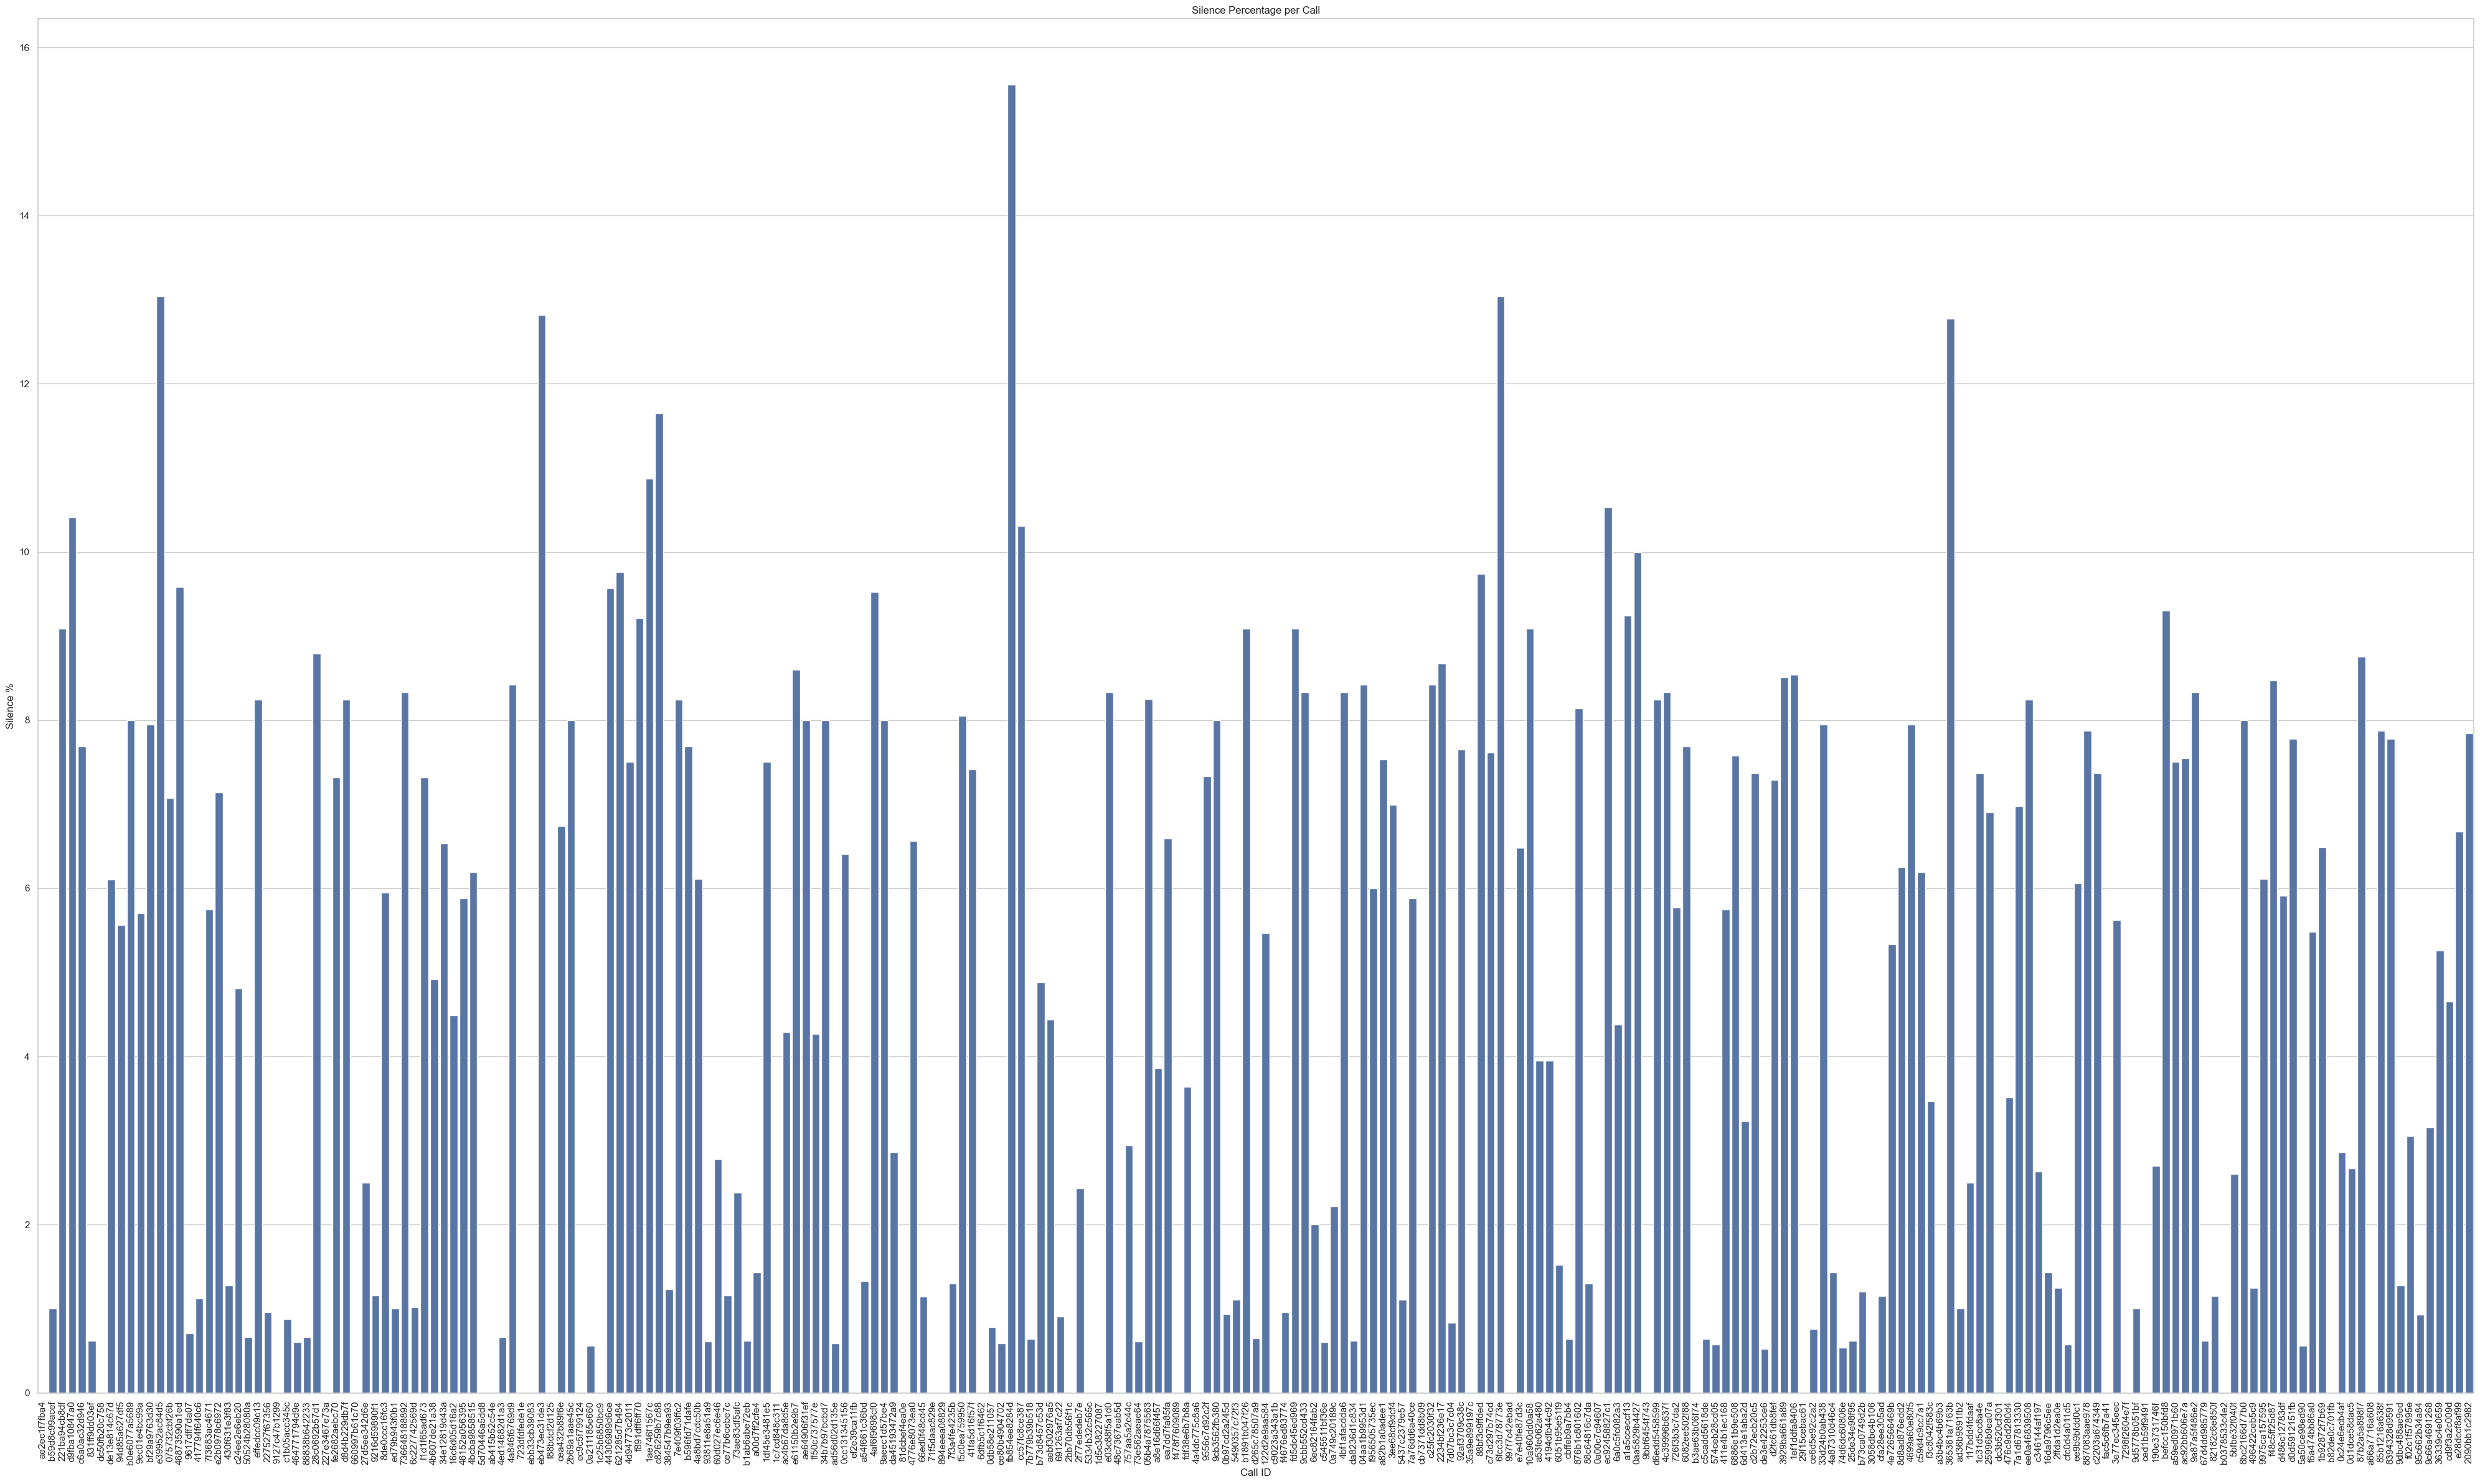

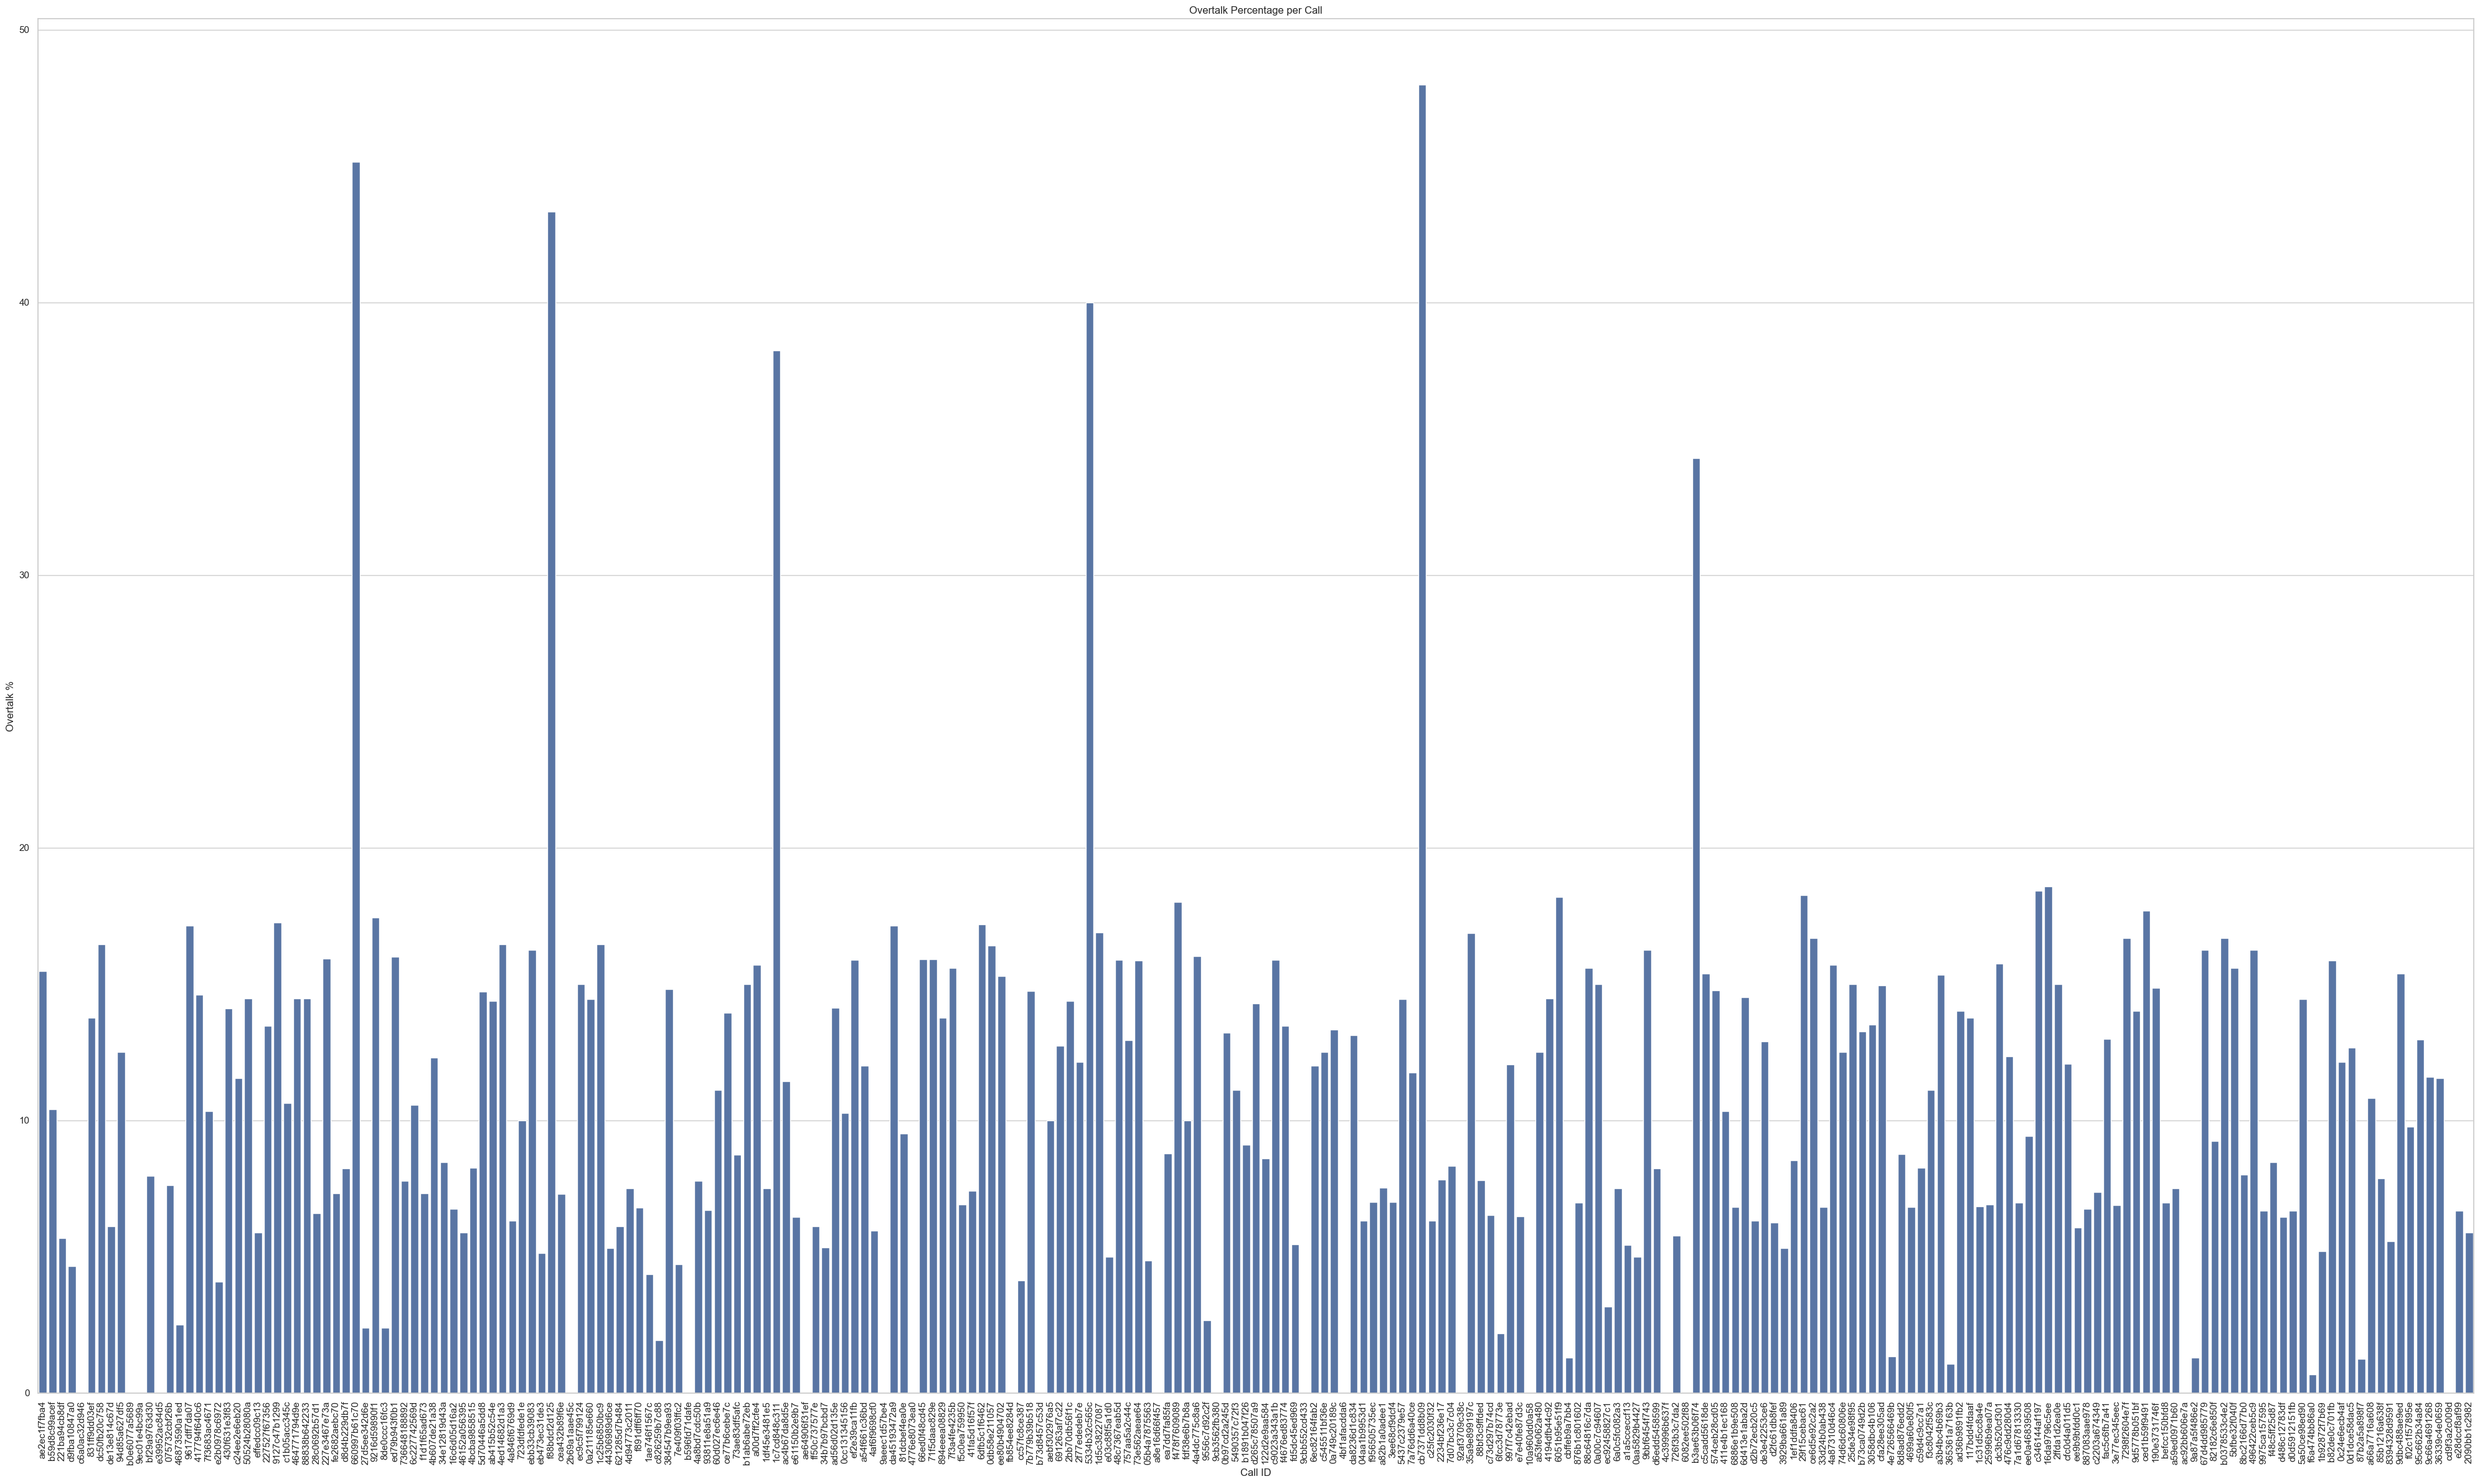

In [83]:
sns.set(style="whitegrid")

plt.figure(figsize=(40,24))
sns.barplot(data=df_metrics, x="call_id", y="silence_percentage")
plt.xticks(rotation=90)
plt.title("Silence Percentage per Call")
plt.ylabel("Silence %")
plt.xlabel("Call ID")
plt.tight_layout()
plt.show()

plt.figure(figsize=(40,24))
sns.barplot(data=df_metrics, x="call_id", y="overtalk_percentage")
plt.xticks(rotation=90)
plt.title("Overtalk Percentage per Call")
plt.ylabel("Overtalk %")
plt.xlabel("Call ID")
plt.tight_layout()
plt.show()

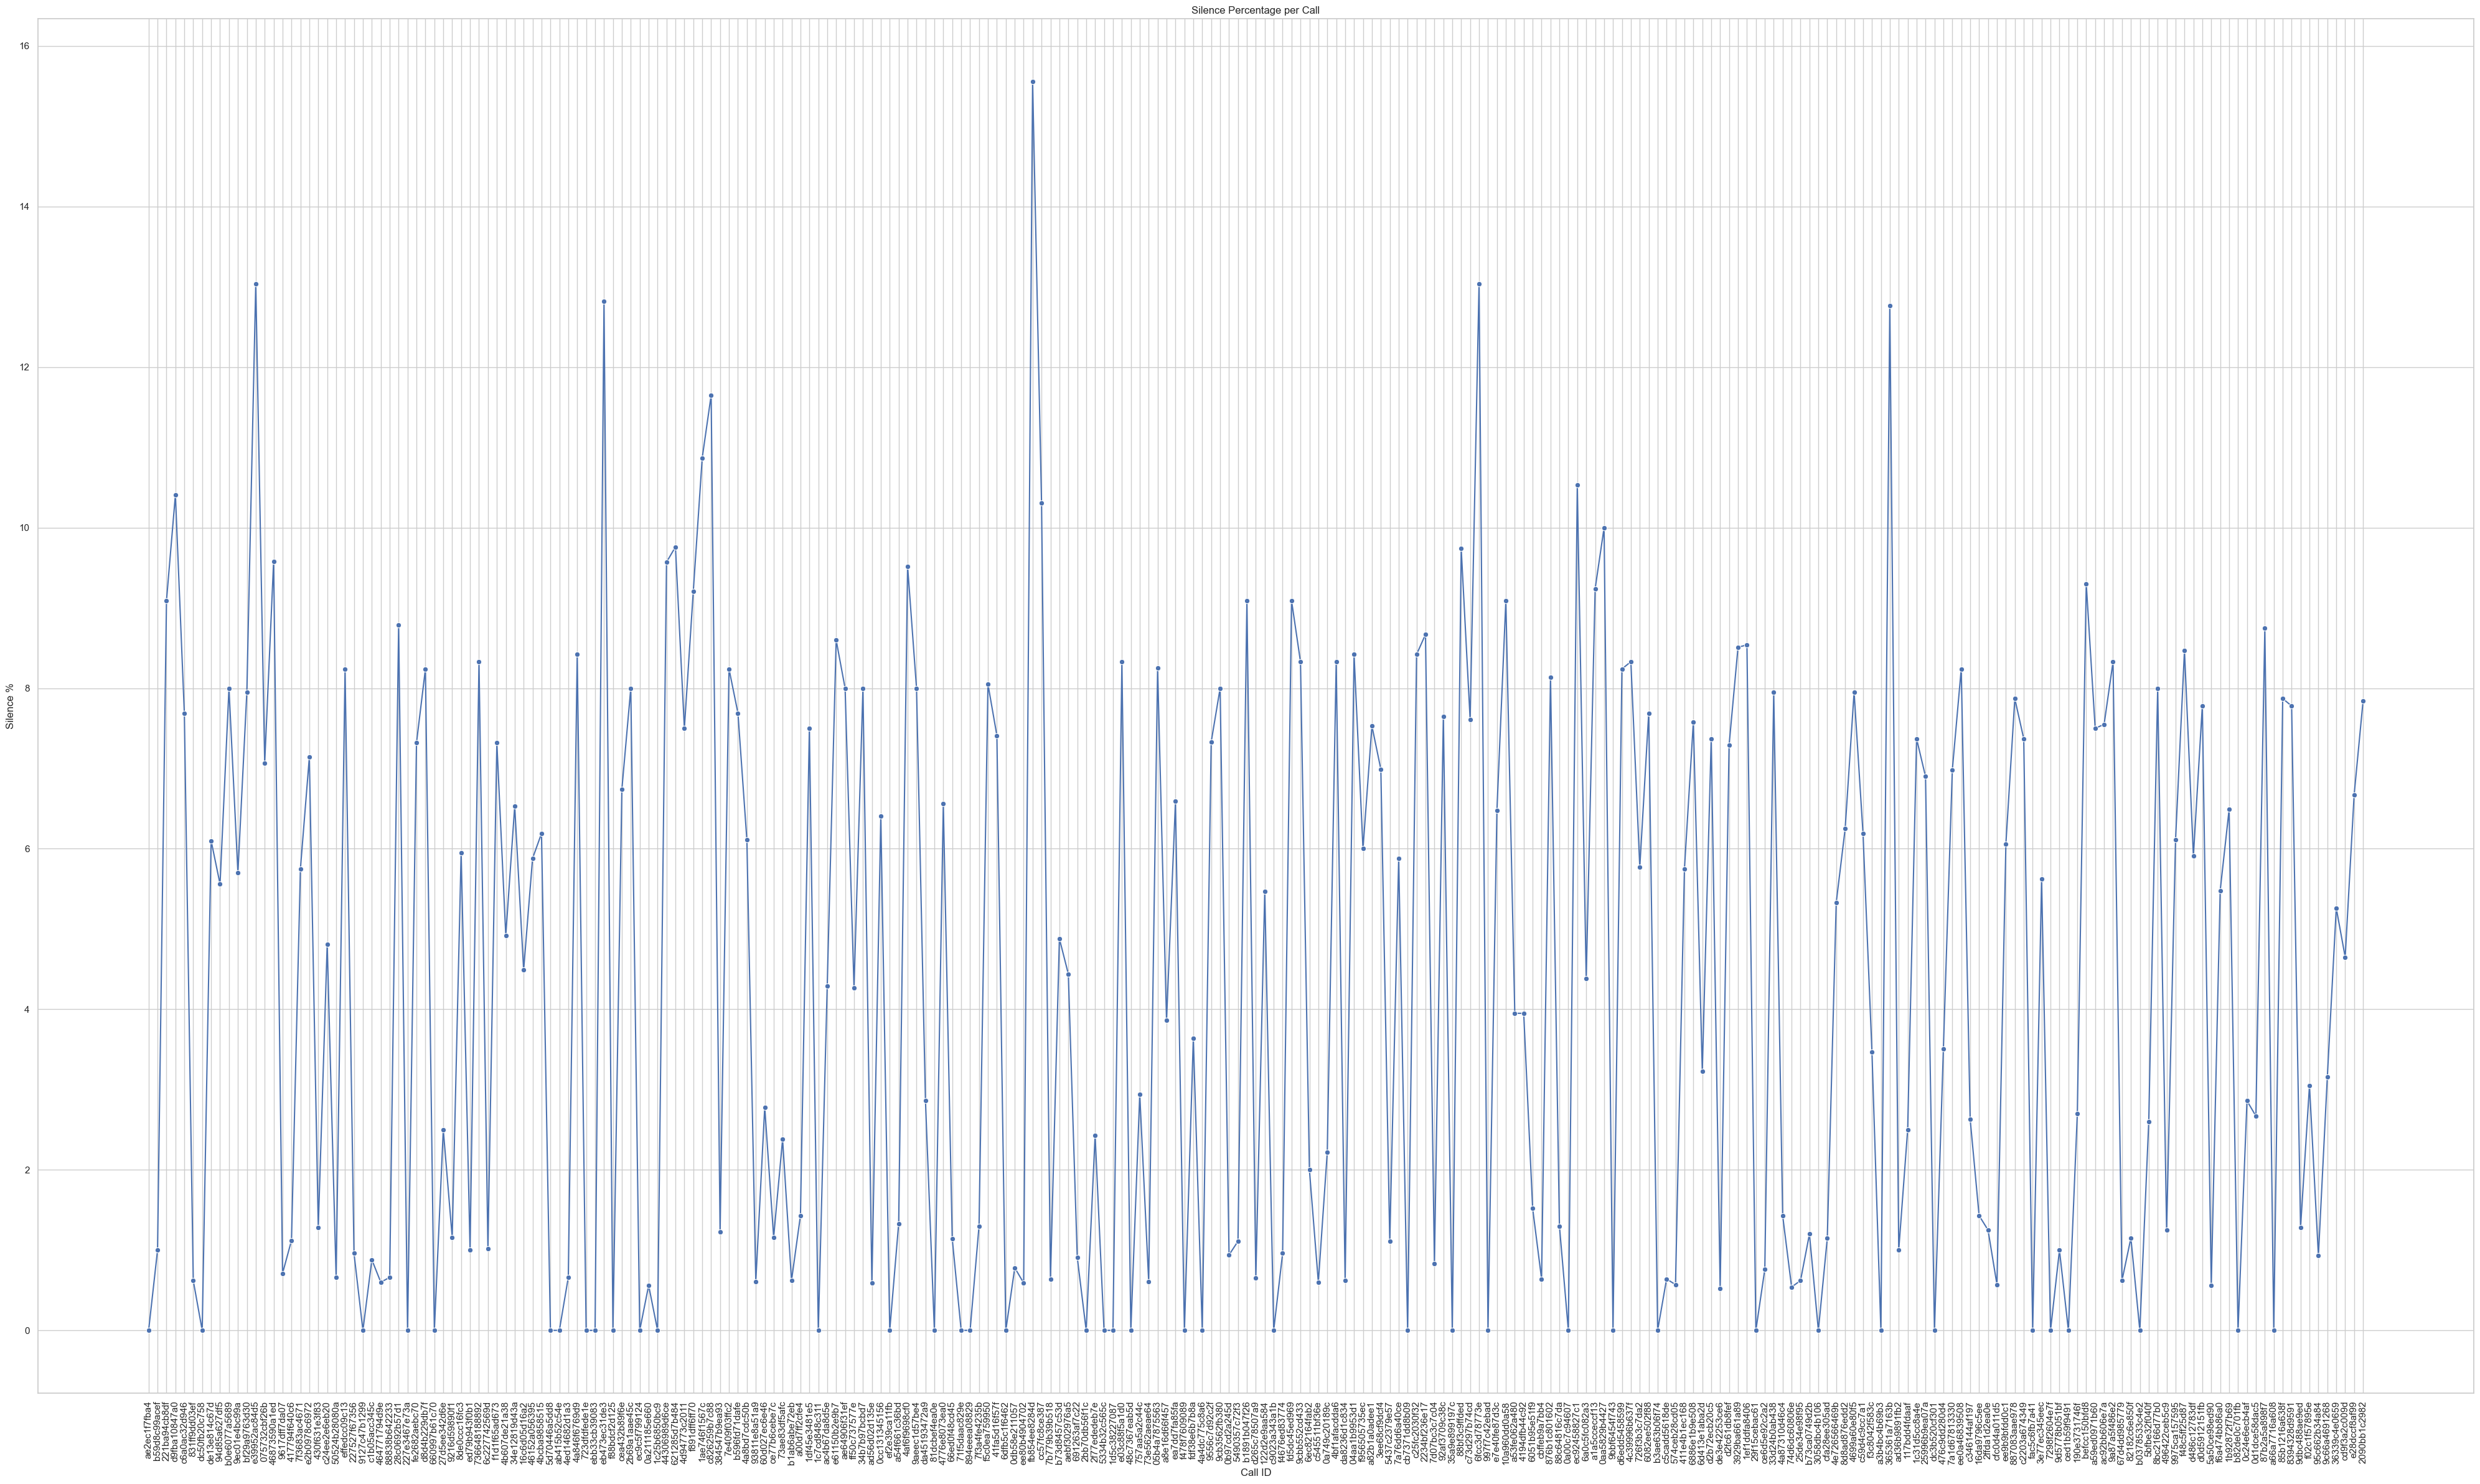

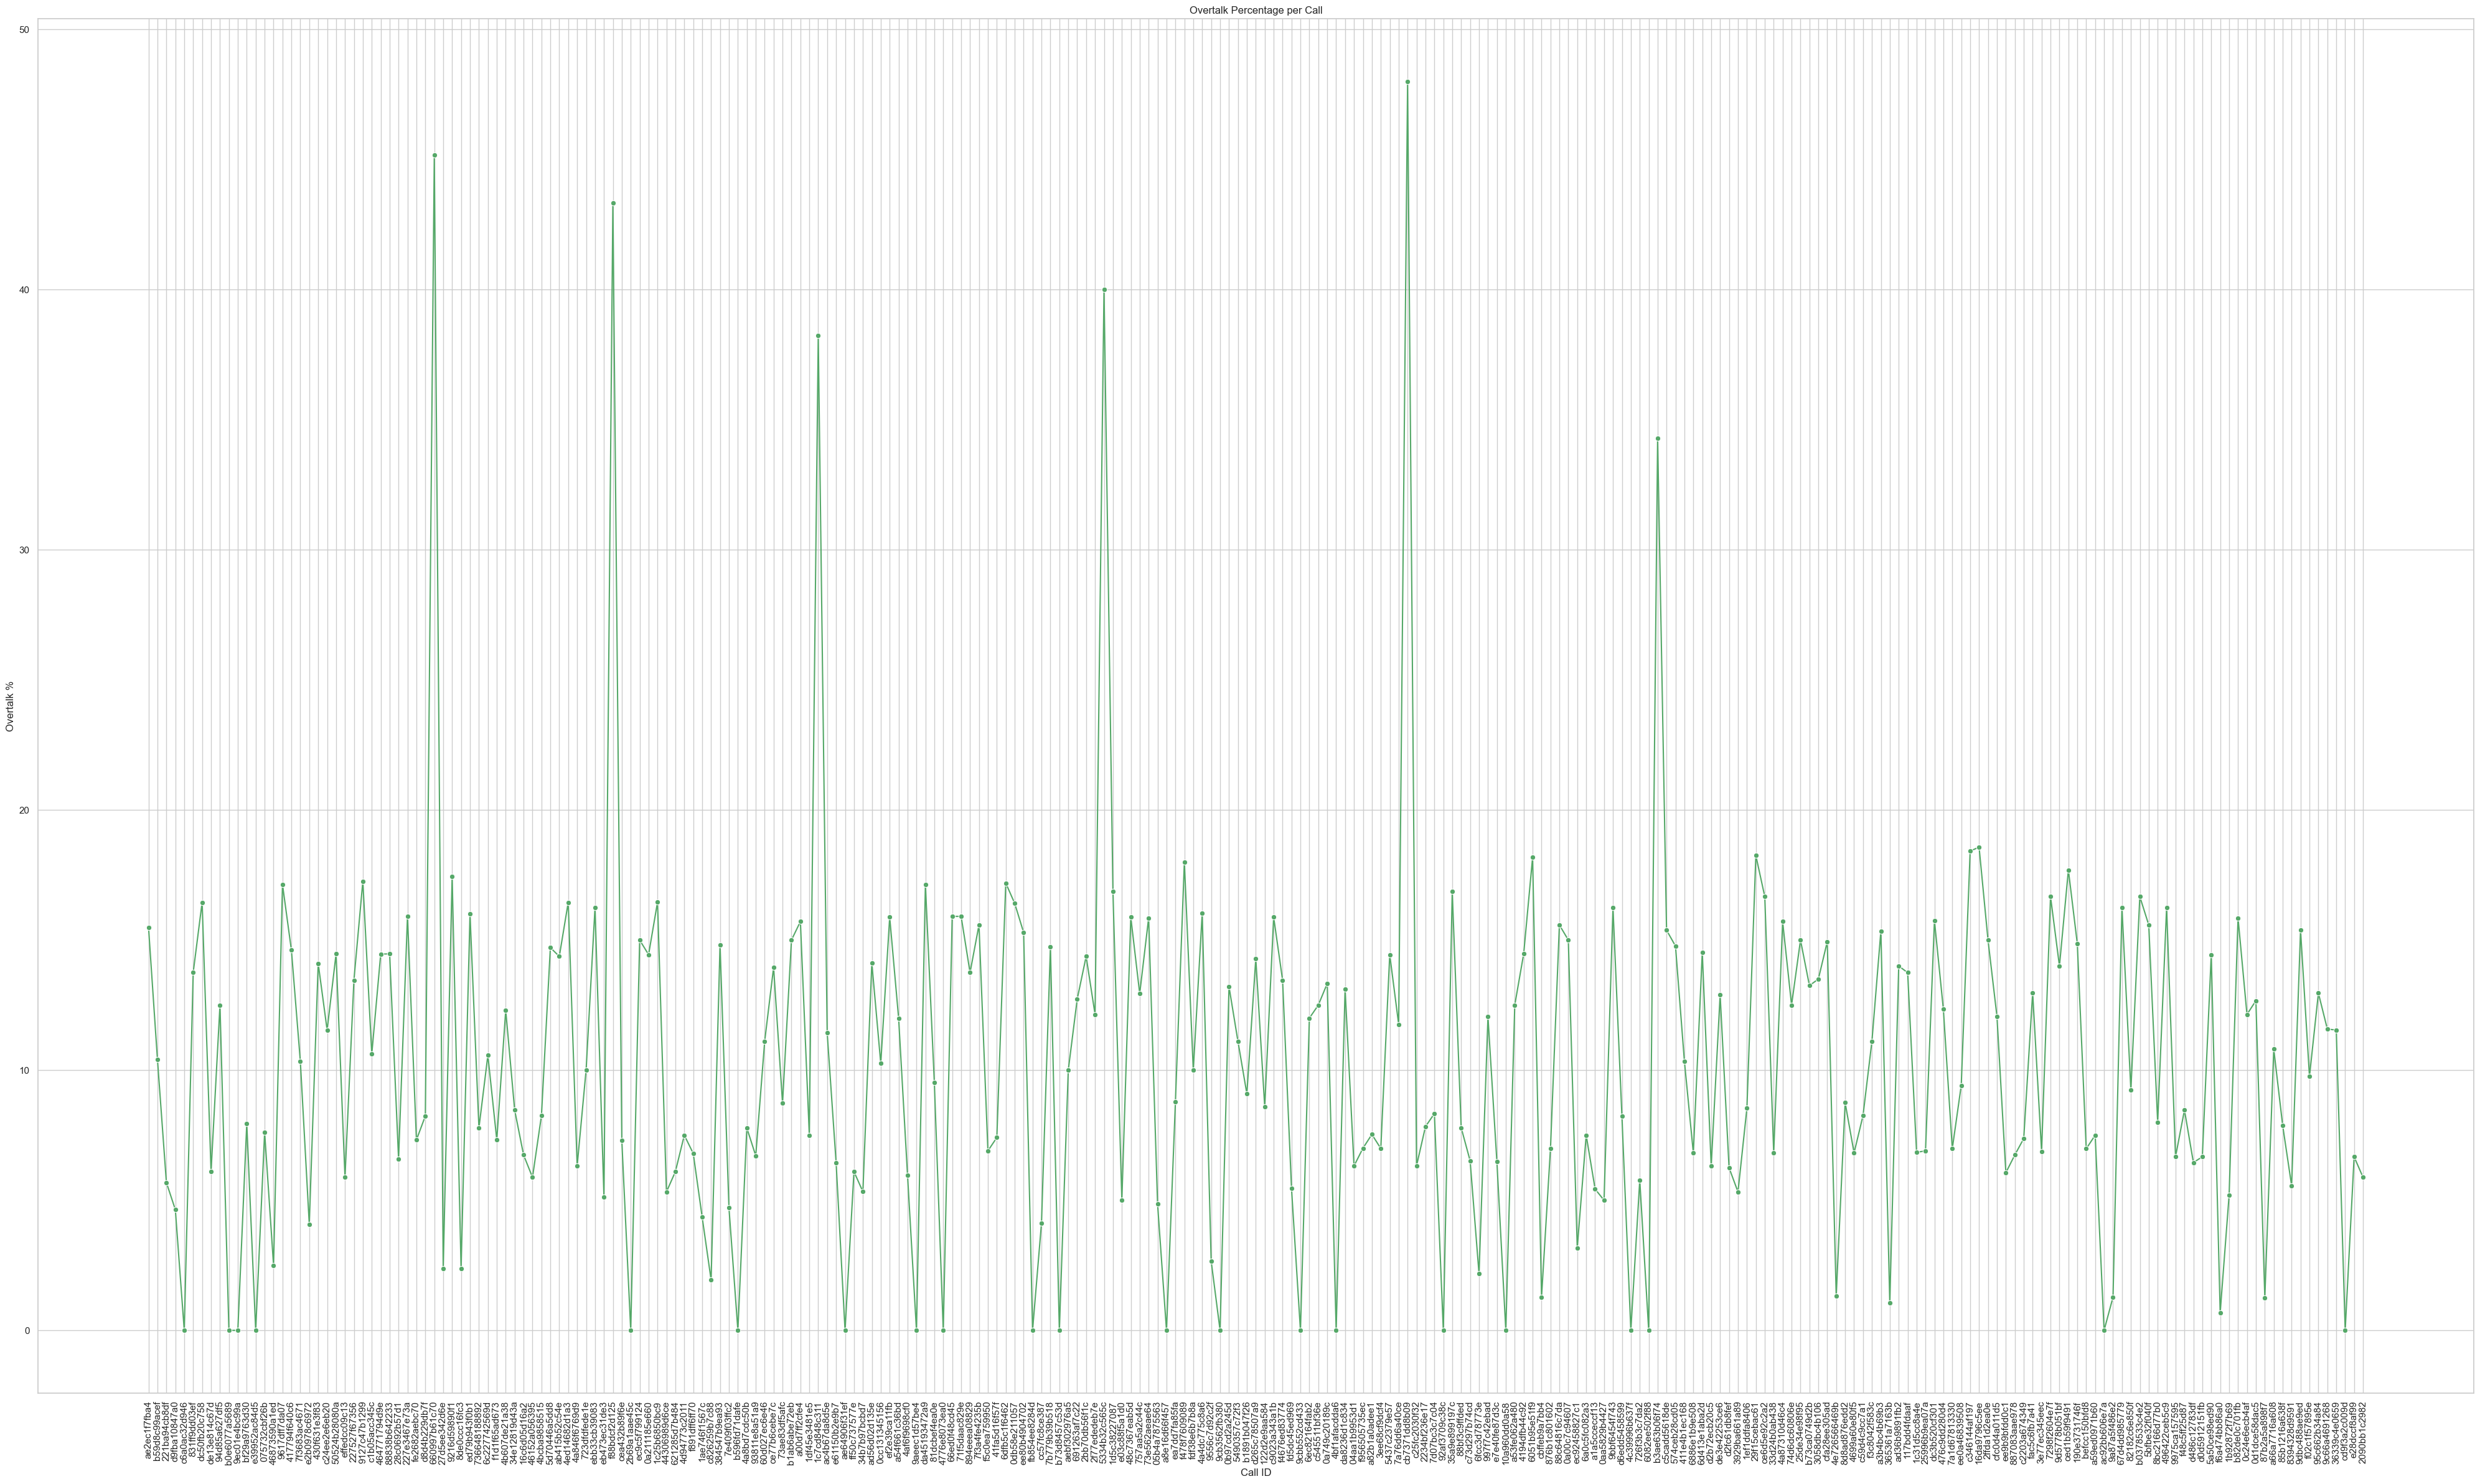

In [85]:
sns.set(style="whitegrid")

plt.figure(figsize=(40, 24))
sns.lineplot(data=df_metrics, x="call_id", y="silence_percentage", marker="o", color="b")
plt.xticks(rotation=90)
plt.title("Silence Percentage per Call")
plt.ylabel("Silence %")
plt.xlabel("Call ID")
plt.tight_layout()
plt.show()

plt.figure(figsize=(40, 24))
sns.lineplot(data=df_metrics, x="call_id", y="overtalk_percentage", marker="o", color="g")
plt.xticks(rotation=90)
plt.title("Overtalk Percentage per Call")
plt.ylabel("Overtalk %")
plt.xlabel("Call ID")
plt.tight_layout()
plt.show()